# Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from plotnine import ggplot, aes, geom_bar, facet_wrap, geom_point, geom_boxplot, theme, element_text, geom_histogram
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 85)

In [3]:
# read in data
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Overview of Data

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


# Visualize Numerical Features
There are a lot of these. We will run a loop to generate a scatter plot for each feature, and then look through them individually.

In [7]:
# get list of numerical features
num_feats = list(train.dtypes[train.dtypes != 'object'].index)

# remove Id (not predictive) and SalePrice (dependent variable)
num_feats.remove('Id')
num_feats.remove('SalePrice')

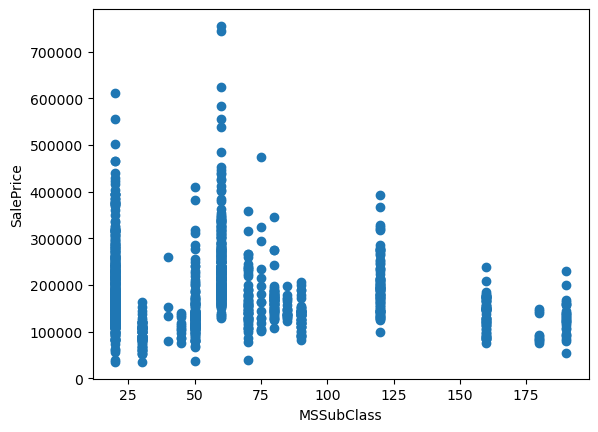

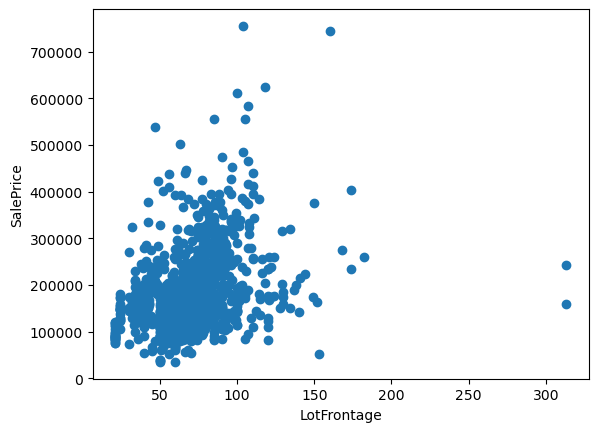

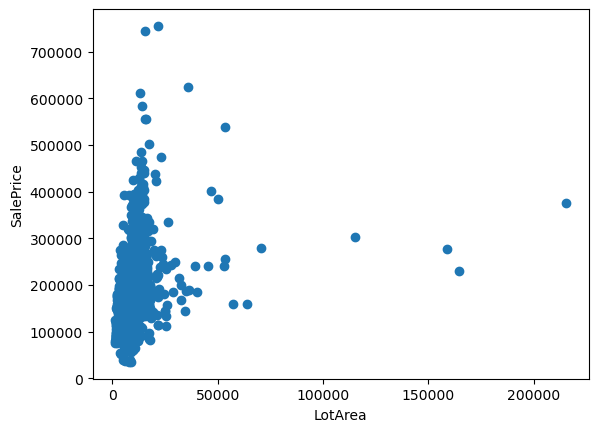

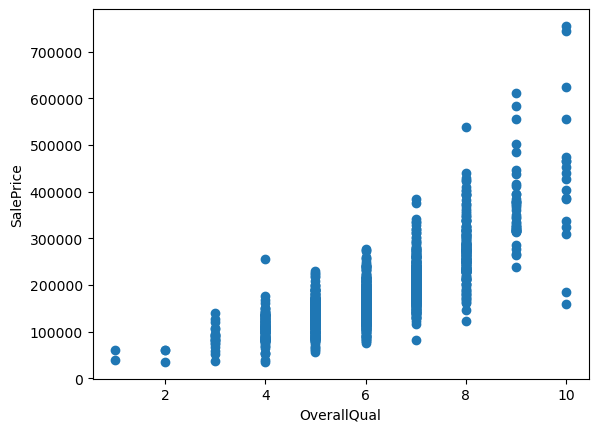

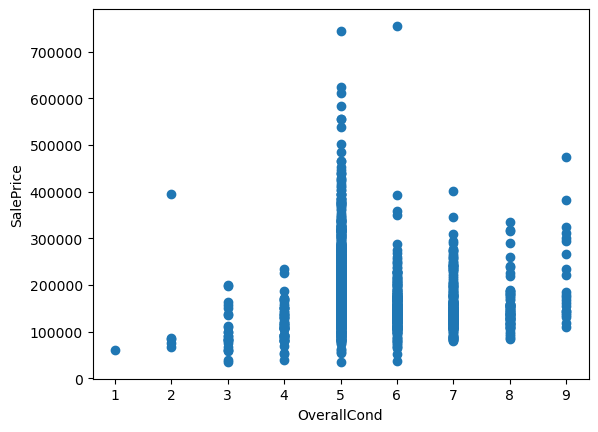

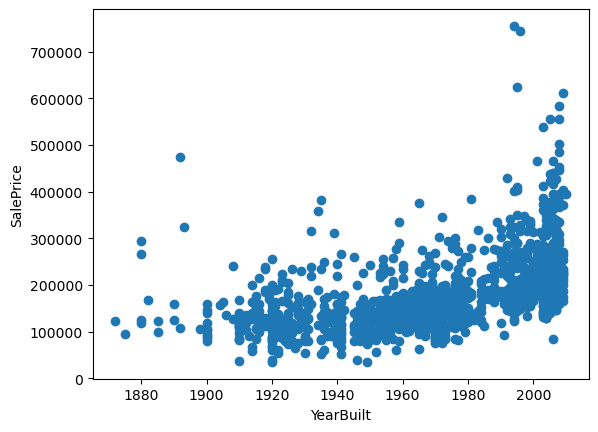

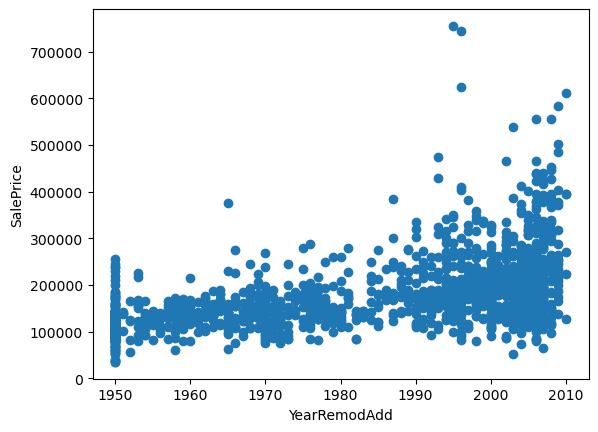

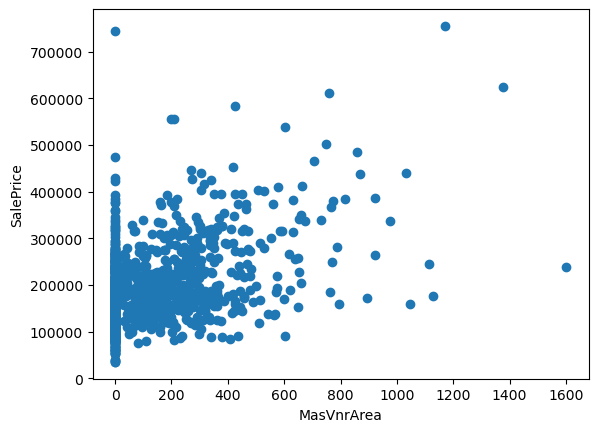

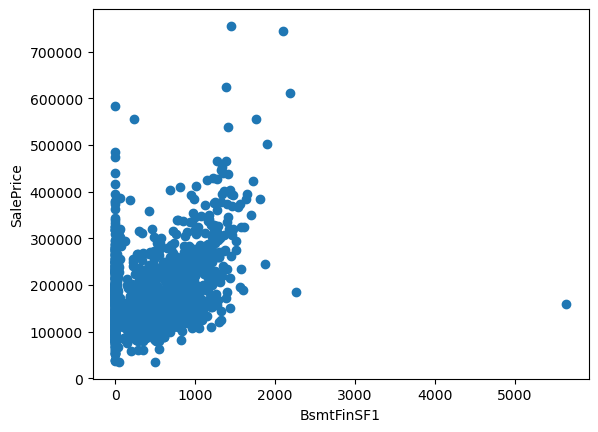

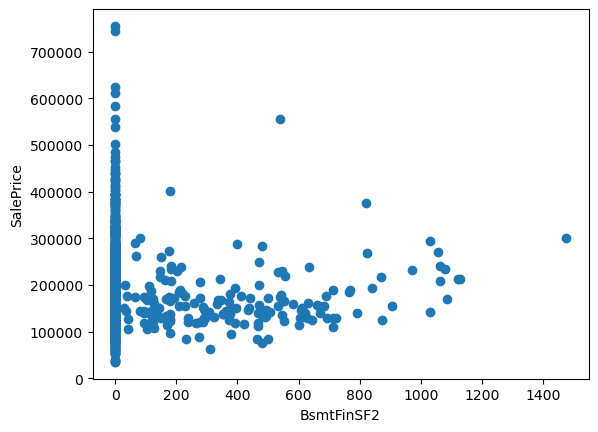

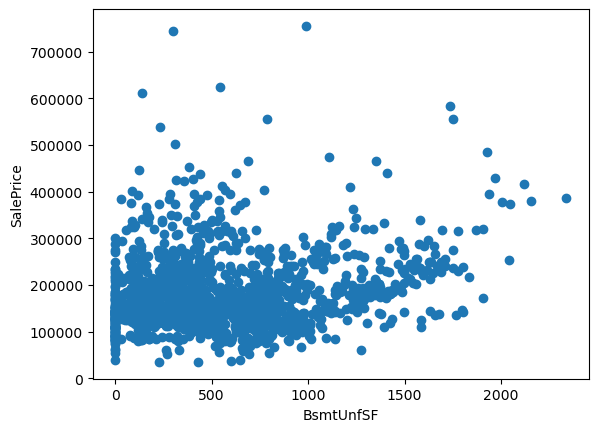

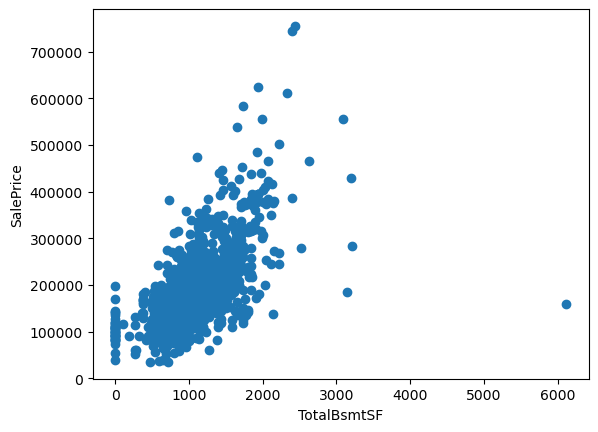

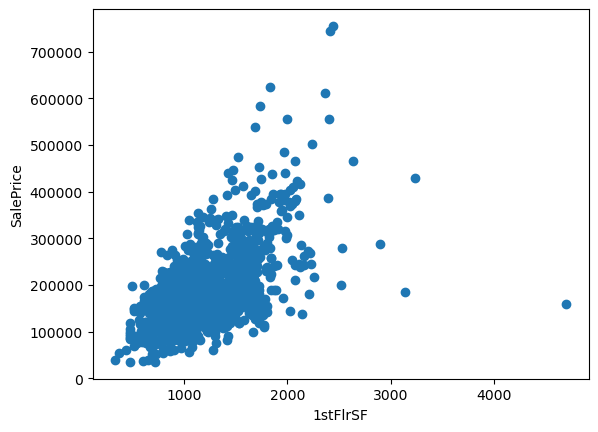

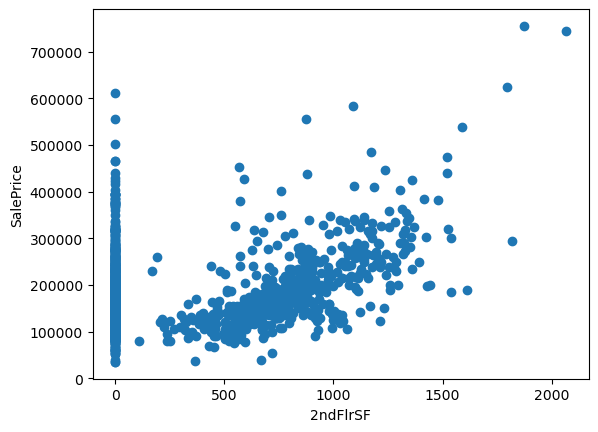

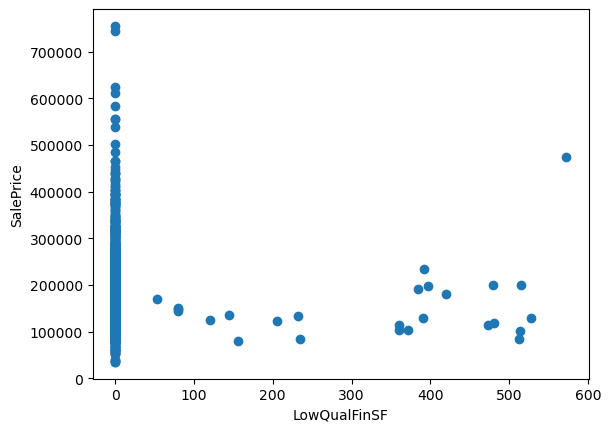

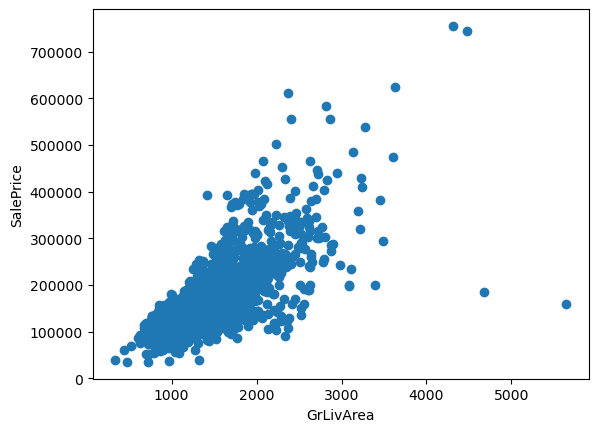

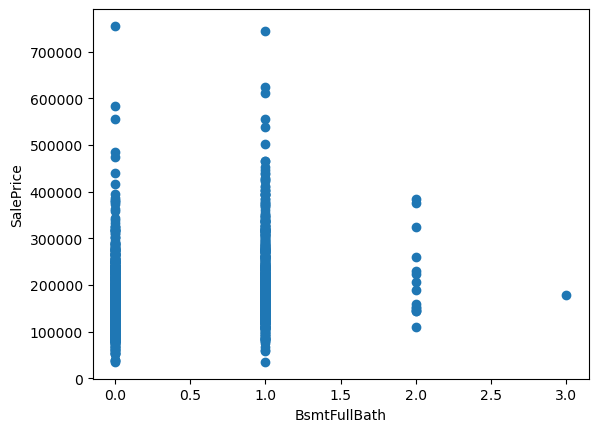

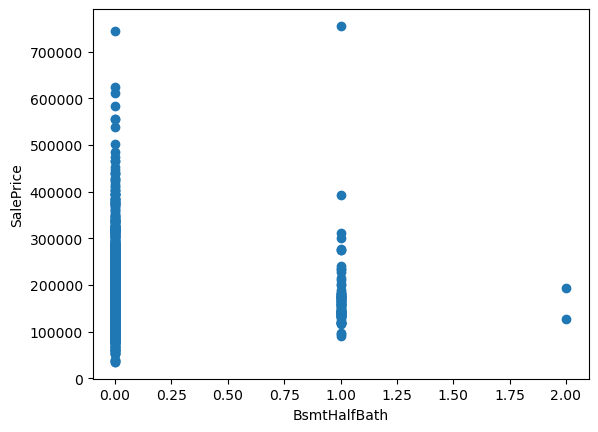

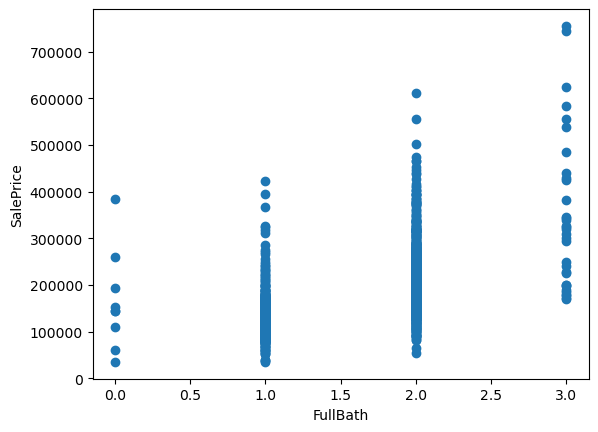

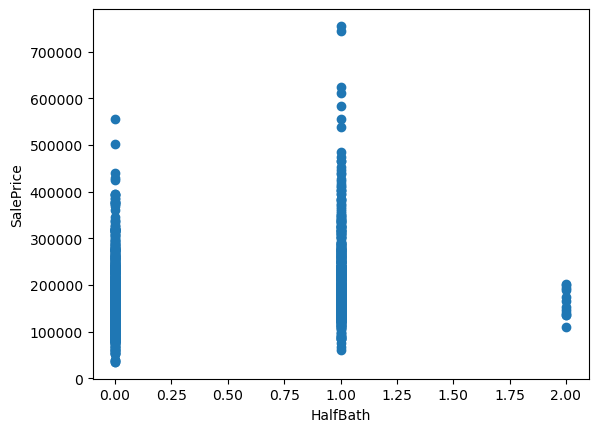

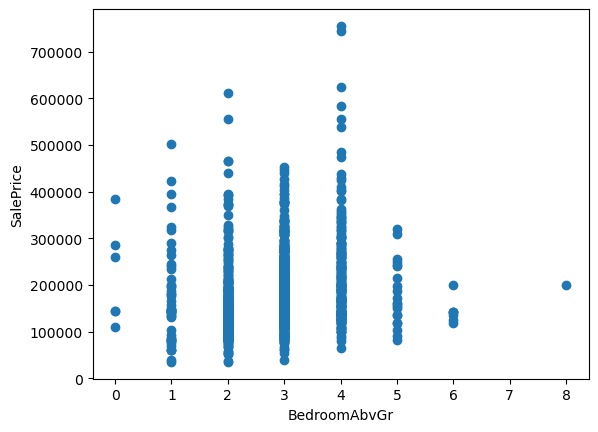

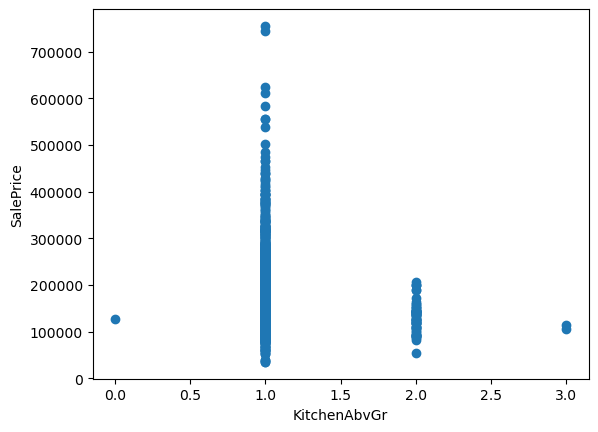

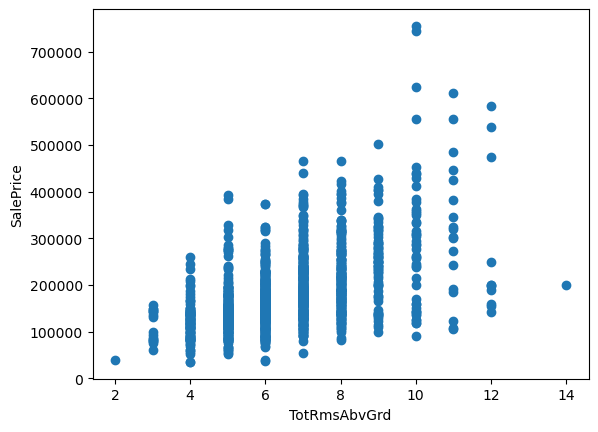

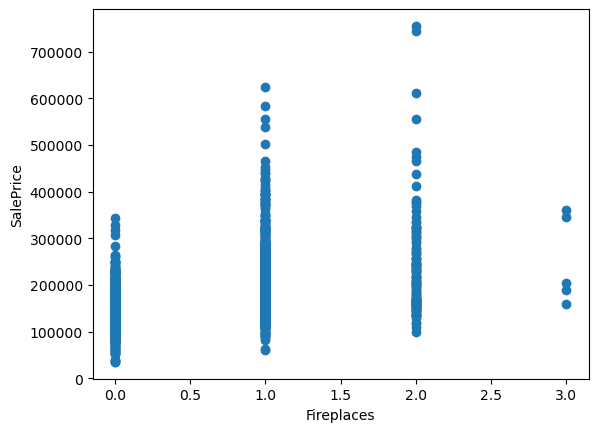

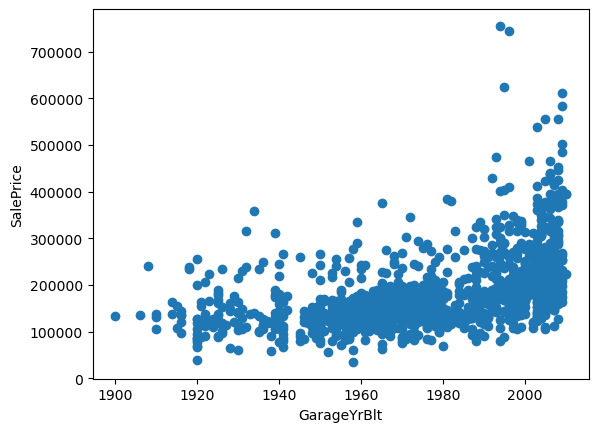

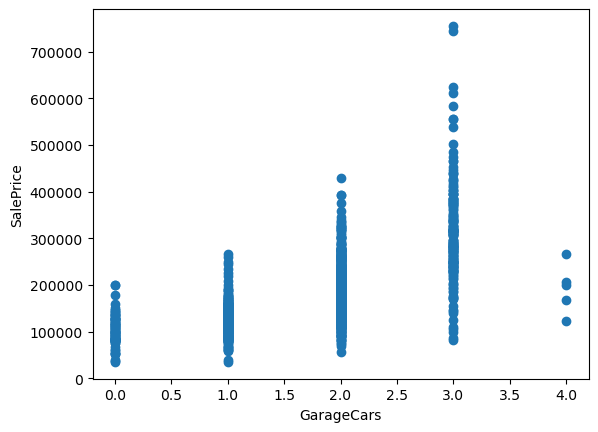

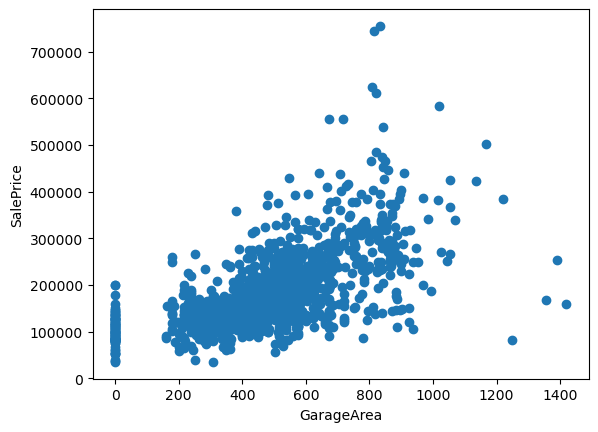

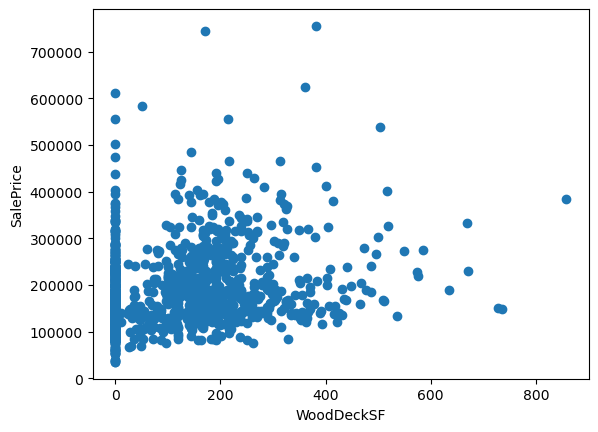

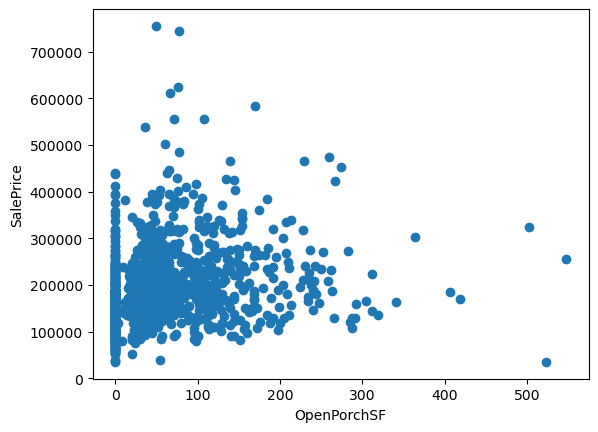

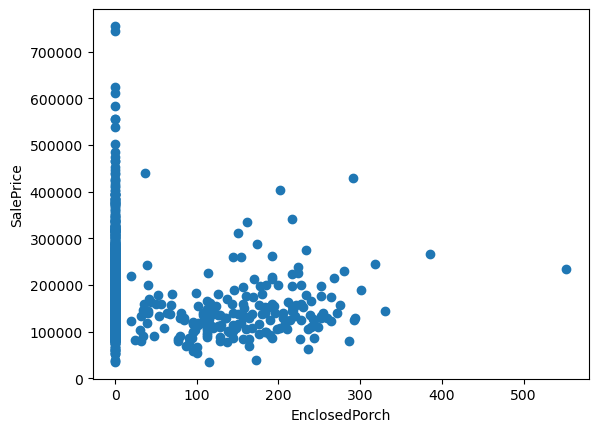

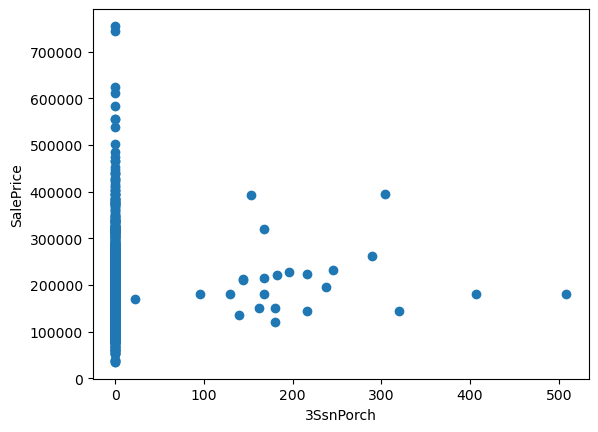

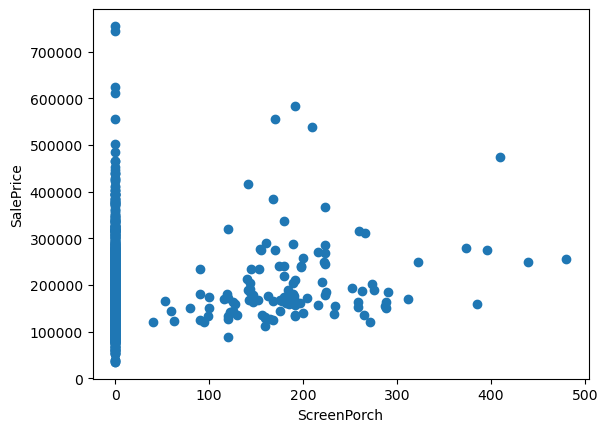

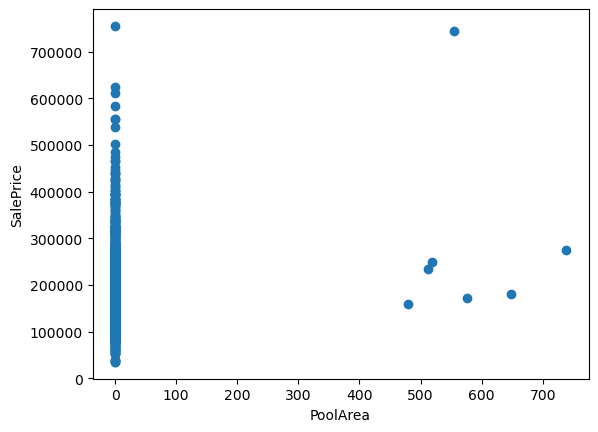

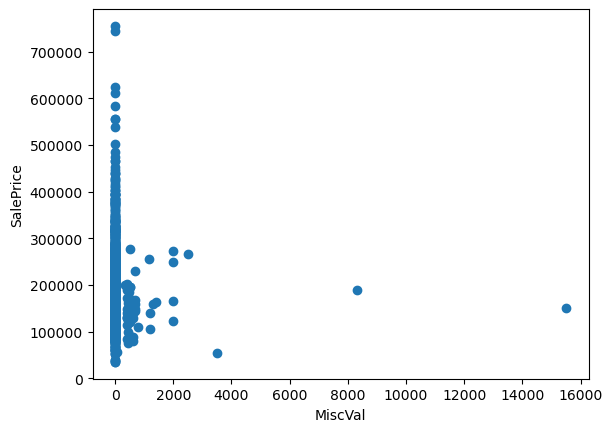

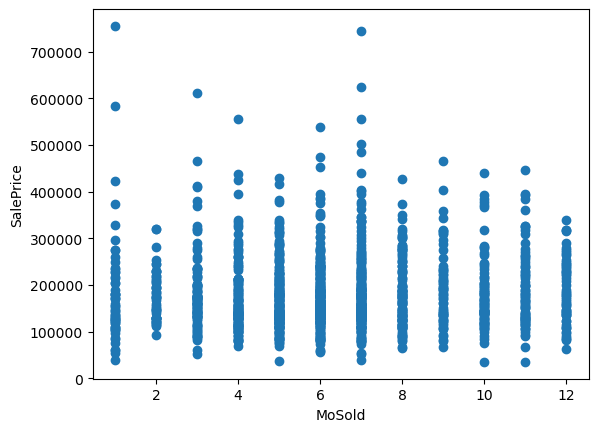

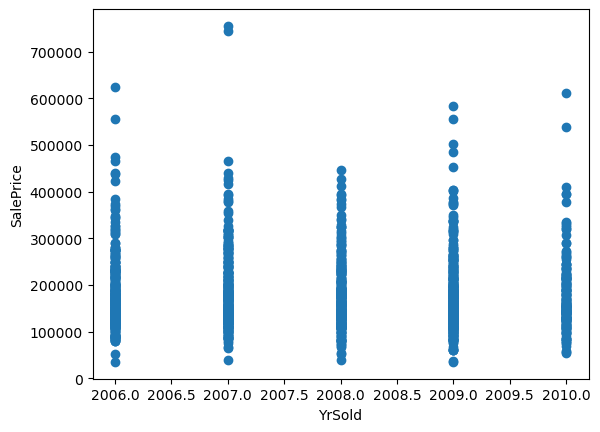

In [8]:
# plot all numerical features
for f in num_feats:
    plt.scatter(x=f, y='SalePrice', data=train, )
    plt.xlabel(f)
    plt.ylabel('SalePrice')
    plt.show()

### Observations
We see some clear outliers. For now, lets drop these.

### Drop outliers

From performing train.query('feature > value'), based on our plots, we can see which records are outliers.

Another more concrete way to look for outliers is by using stats.zscore

In [9]:
train.query('LotFrontage > 300')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [10]:
stats.zscore(train['LotArea']).sort_values().tail(5)

451     6.037793
706    10.486449
249    14.881285
335    15.448542
313    20.518273
Name: LotArea, dtype: float64

We will drop the following Id's:

LotFrontage\
935, 1299

LotArea\
250, 314, 336, 707, maybe 1397

OverallQual\
maybe 524

OverallCond\
379, 1183, 692

YearBuilt\
186

YearRemodAdd\
314

MasVnrArea\
298

BsmtFinSF1\
1299

BsmtFinSF2\
441

TotalBsmtSF\
1299

LowQualFinSF\
186

GrLivArea\
524, 1299

BsmtFullBath\
739

BsmtHalfBath\
598, 955

BedroomAbvGr\
636

KitchenAbvGr\
49, 810

TotRmsAbvGr\
636

GarageArea\
1062, 1191

OpenPorchSF\
496

EnclosedPorch\
198

In [11]:
outlier_ids = [935, 1299, 250, 314, 336, 707, 1397, 524, 379, 1183, 692, 186, 298,
               441, 739, 598, 955, 636, 49, 810, 1062, 1191, 496, 198]

In [12]:
# drop ids that we determined were outliers
train = train[~train['Id'].isin(outlier_ids)]

# Handle NA Values

In [13]:
# take a look at na values in our dataset
nan_df = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
nan_df.head(20)

,0
PoolQC,1432
MiscFeature,1385
Alley,1347
Fence,1160
MasVnrType,859
FireplaceQu,683
LotFrontage,254
GarageYrBlt,76
GarageCond,76
GarageType,76


In [14]:
nan_cols = list(nan_df.head(19).index)

Many of these are probably nan since they do not possess the attribute at all (e.g. alley, basement, etc.). We will also need to fill our nan values in both the train and test sets.

In [15]:
# print out unique values for each catgegorical feature with nans
for c in nan_cols:
    if train[c].dtype=='object':
        print(f'{c}: \n{train[c].unique()}')

PoolQC: 
[nan 'Fa' 'Gd']
MiscFeature: 
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley: 
[nan 'Grvl' 'Pave']
Fence: 
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MasVnrType: 
['BrkFace' nan 'Stone' 'BrkCmn']
FireplaceQu: 
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageCond: 
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
GarageType: 
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish: 
['RFn' 'Unf' 'Fin' nan]
GarageQual: 
['TA' 'Fa' 'Gd' nan 'Po' 'Ex']
BsmtFinType2: 
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtExposure: 
['No' 'Gd' 'Mn' 'Av' nan]
BsmtQual: 
['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond: 
['TA' 'Gd' nan 'Fa' 'Po']
BsmtFinType1: 
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Electrical: 
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [16]:
# these columns can be filled with 'No' since they don't possess the attribute
no_cols = ['PoolQC', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'GarageCond',
           'GarageType', 'GarageFinish', 'GarageQual', 'BsmtQual', 'BsmtCond',
           'BsmtFinType1', 'BsmtFinType2']

for c in no_cols:
    train[c] = train[c].fillna('No')
    test[c] = test[c].fillna('No')

In [17]:
train['BsmtExposure'] = train['BsmtExposure'].fillna('NoBase')
test['BsmtExposure'] = test['BsmtExposure'].fillna('NoBase')

train['Electrical'] = train['Electrical'].fillna('SBrkr')
test['Electrical'] = test['Electrical'].fillna('SBrkr')

In [18]:
# next look at numerical columns with nan values
for c in nan_cols:
    if train[c].dtype != 'object':
        print(c)

LotFrontage
GarageYrBlt
MasVnrArea


In [19]:
train['LotFrontage'] = train['LotFrontage'].fillna(0)
test['LotFrontage'] = test['LotFrontage'].fillna(0)

train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [20]:
# in most cases, the garage was probably built the same year as the home. Let's check
train['GarageYrBlt'].corr(train['YearBuilt']) # we will probably drop this

0.8280069030450473

Lets plot some of our categorical variables with nan values to determine how useful they are.

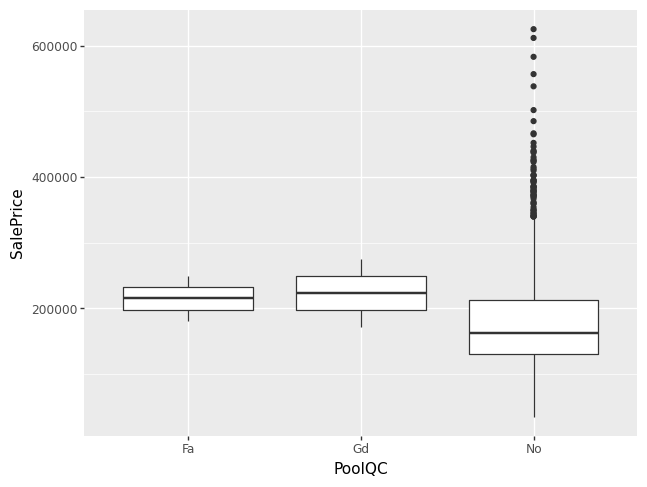

None


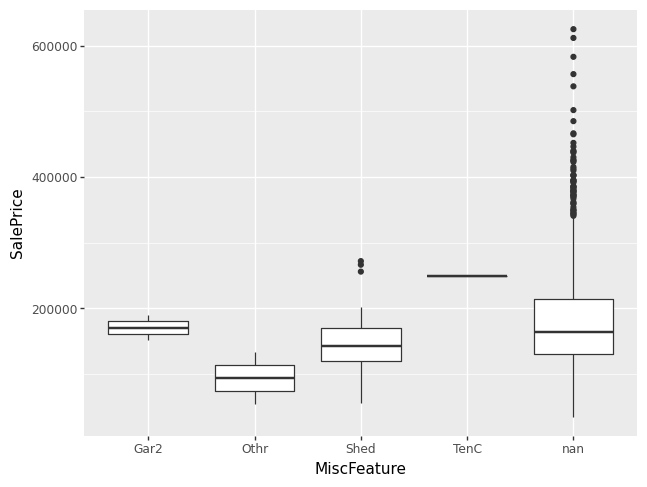

None


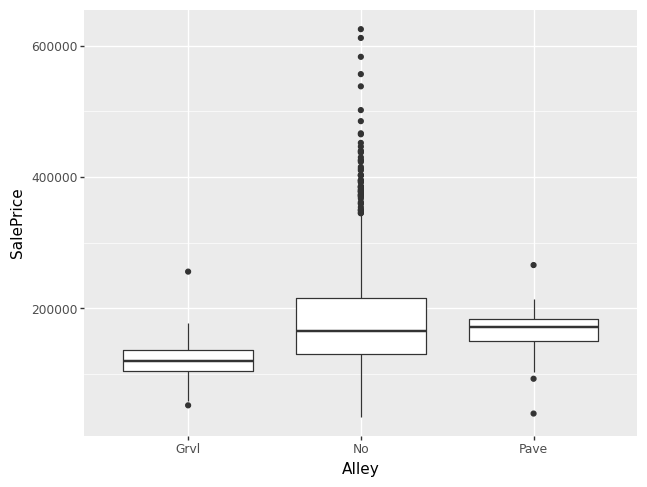

None


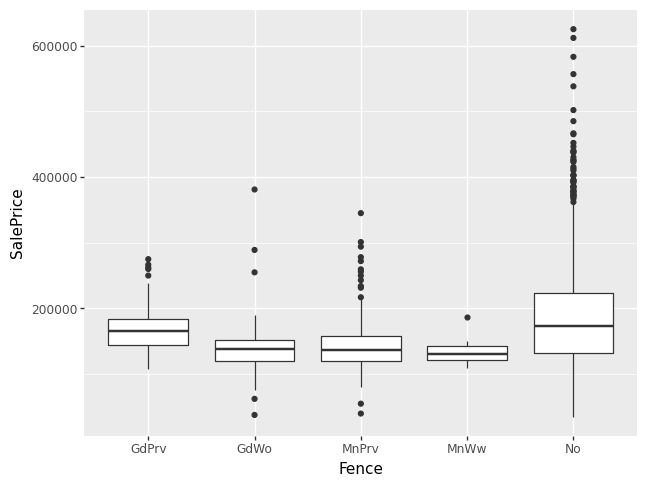

None


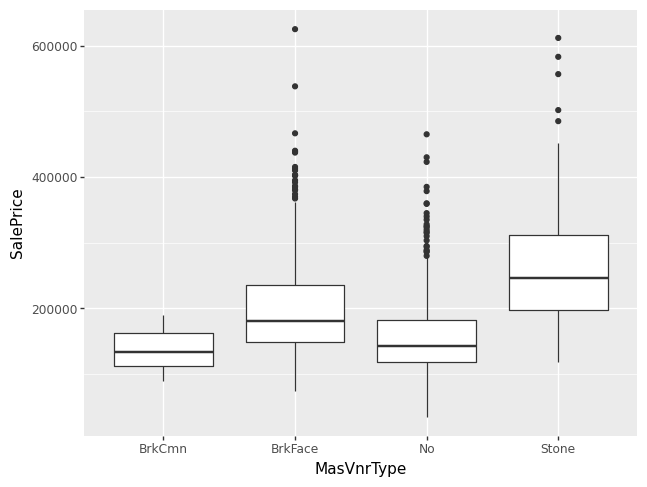

None


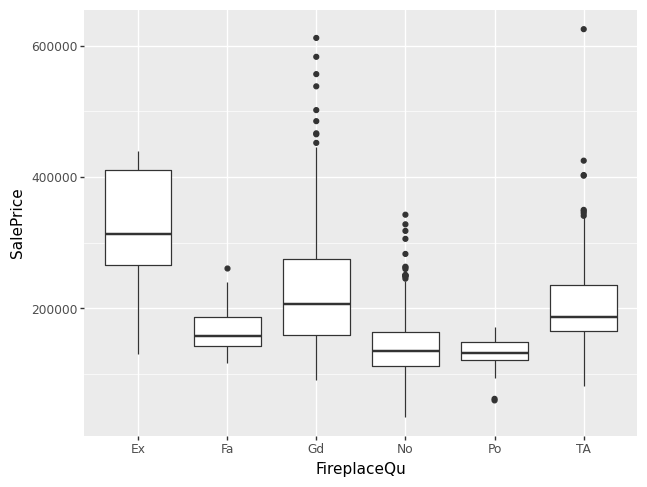

None


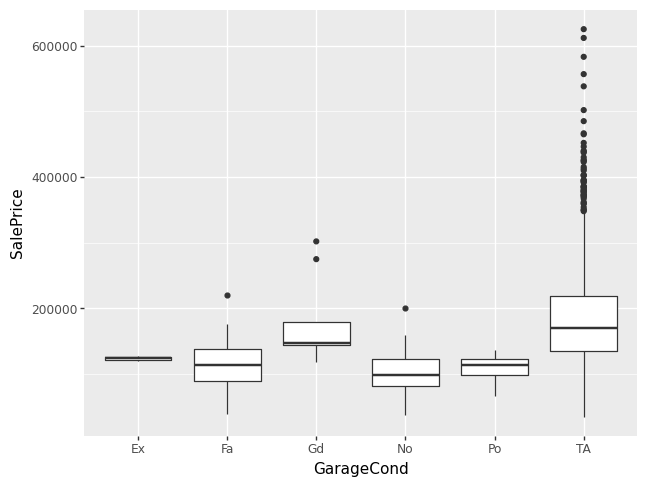

None


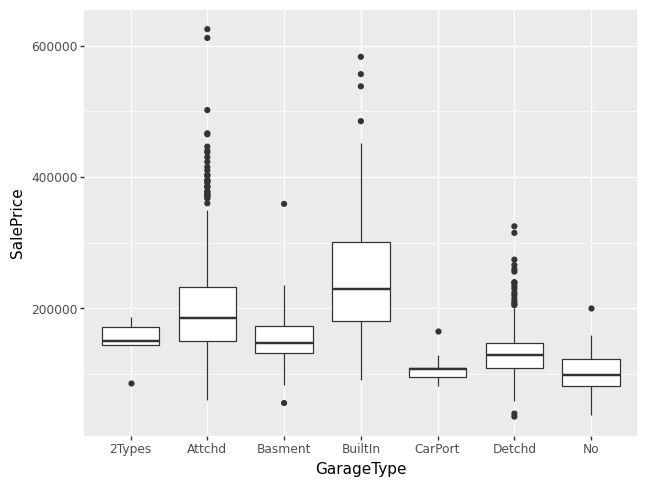

None


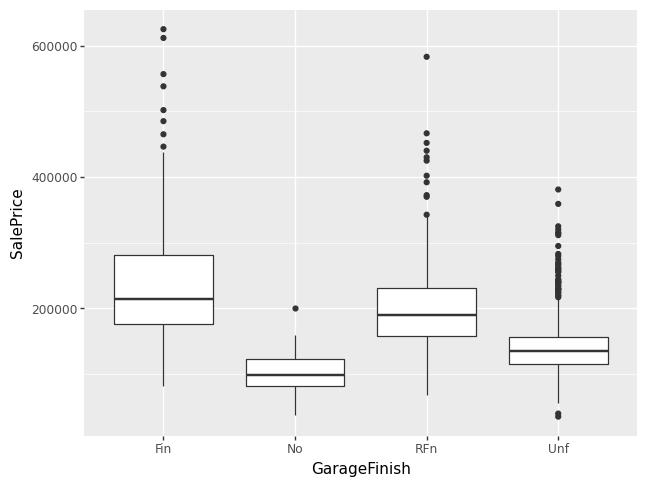

None


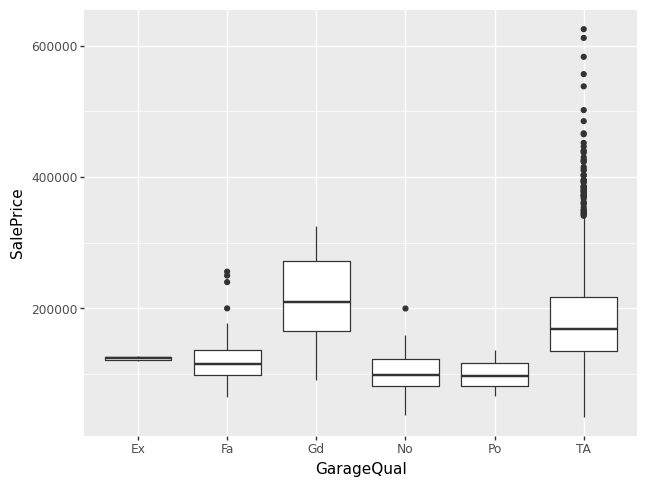

None


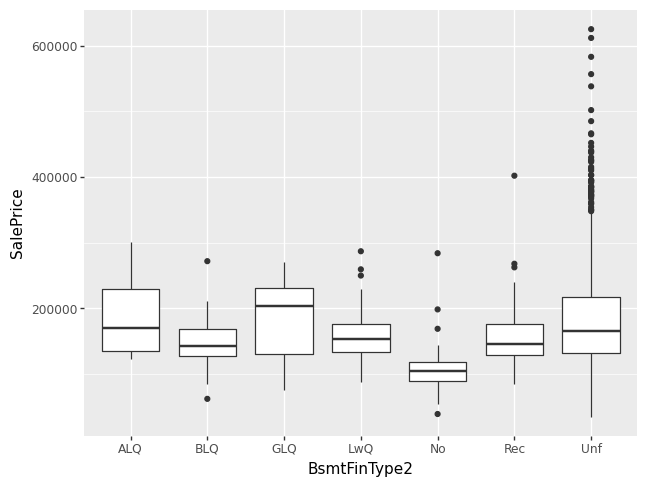

None


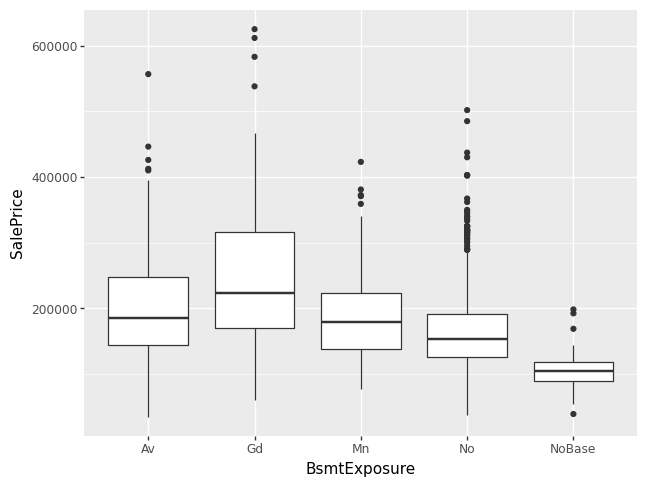

None


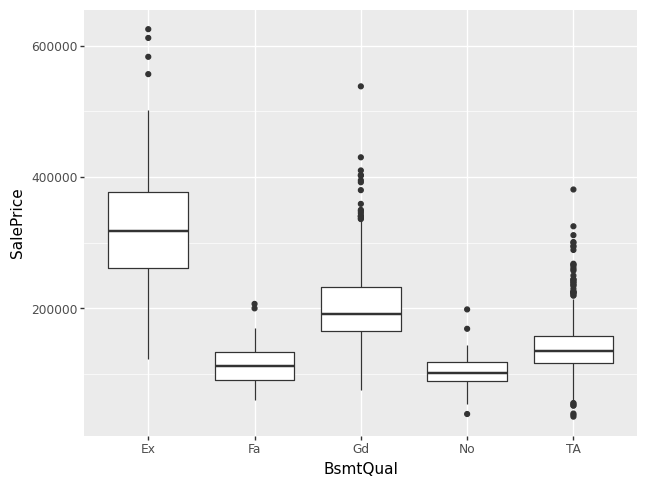

None


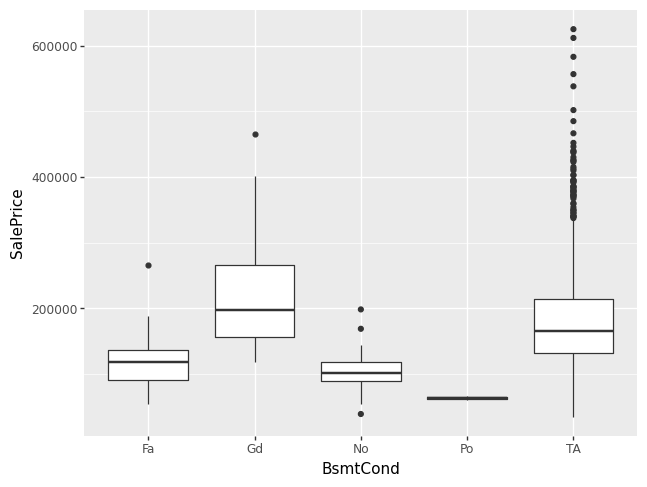

None


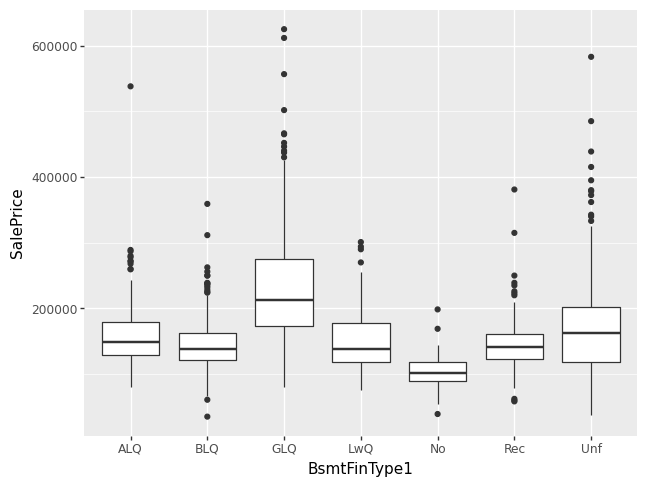

None


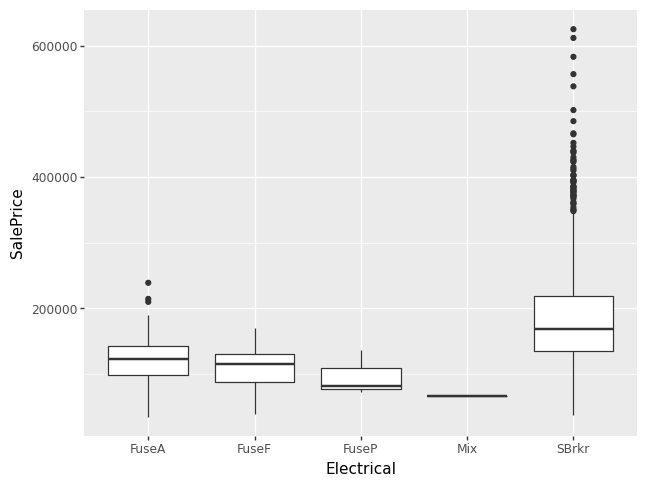

None


In [21]:
for c in nan_cols:
    if train[c].dtype=='object':
        p = (
            ggplot(train) +
            aes(train[c], 'SalePrice') +
            geom_boxplot()
        )
        print(p.show())

In [22]:
# lets drop some columns that have a lot of nan values or don't seem useful
train = train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt',
                            'GarageCond', 'BsmtFinType2'])
test = test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt',
                            'GarageCond', 'BsmtFinType2'])

### Feature Engineering

In [23]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

train['RemodelAge'] = train['YrSold'] - train['YearRemodAdd']
test['RemodelAge'] = test['YrSold'] - test['YearRemodAdd']

train['TotalSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2']
test['TotalSF'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['BsmtFinSF1'] + test['BsmtFinSF2']

train['TotalArea'] = train['GrLivArea'] + train['TotalBsmtSF']
test['TotalArea'] = test['GrLivArea'] + test['TotalBsmtSF']

train['TotalBaths'] = train['BsmtFullBath'] + train['FullBath'] + 0.5 * (train['BsmtHalfBath'] + train['HalfBath'])
test['TotalBaths'] = test['BsmtFullBath'] + test['FullBath'] + 0.5 * (test['BsmtHalfBath'] + test['HalfBath'])

train['TotalPorchSF'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
test['TotalPorchSF'] = test['WoodDeckSF'] + test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

In [24]:
# next, drop the columns used to create these more useful features
# also drop ID since it is not useful for predicting
train = train.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                    'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath',
                    'FullBath', 'BsmtHalfBath', 'HalfBath', 'WoodDeckSF','OpenPorchSF',
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Id'])
test = test.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                    'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath',
                    'FullBath', 'BsmtHalfBath', 'HalfBath', 'WoodDeckSF','OpenPorchSF',
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch'])

<Axes: >

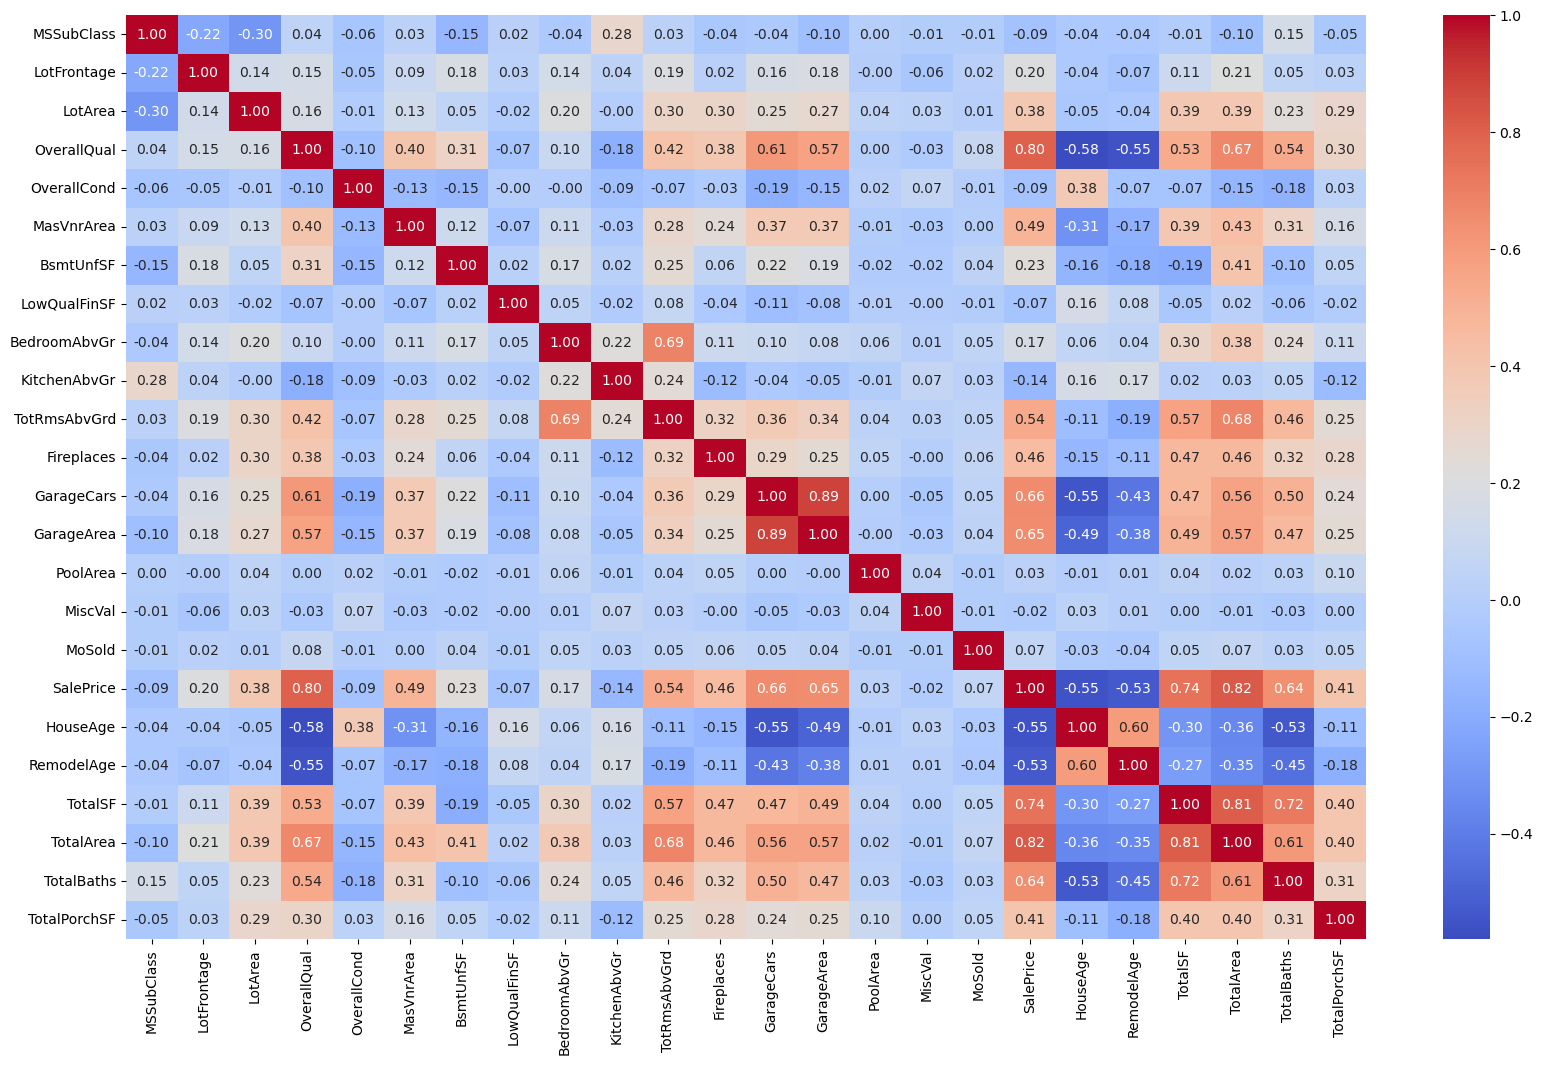

In [25]:
correlation_matrix = train.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

We note some of the features that are highly correlated. We see that GarageArea and GarageCars are highly correlated (0.89), so we should drop one.

In [26]:
train = train.drop(columns=['GarageArea'])
test = test.drop(columns=['GarageArea'])

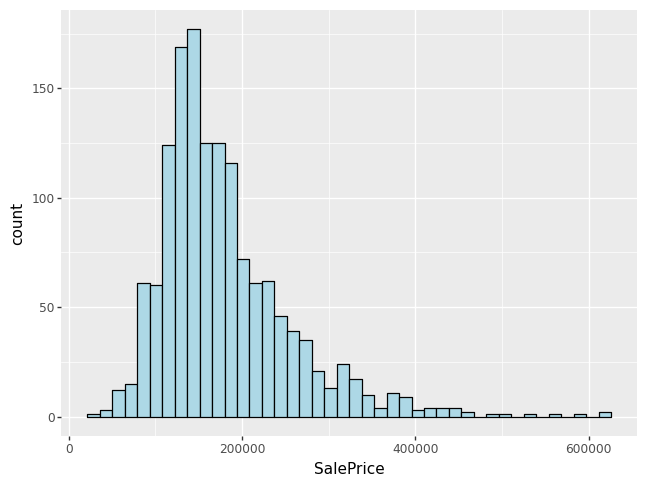

In [27]:
# lets plot our SalePrice
p_sales_hist = (
    ggplot(train) +
    aes(train['SalePrice']) +
    geom_histogram(
        bins=42,
        colour='black',
        fill='lightblue'
    )
)
p_sales_hist.draw()

Note that SalePrice doesn't quite look normal. Lets apply log.

In [28]:
# log1p yields log(1 + x)
# doing this means any 0 values will not raise an error
train['SalePrice'] = np.log1p(train['SalePrice'])

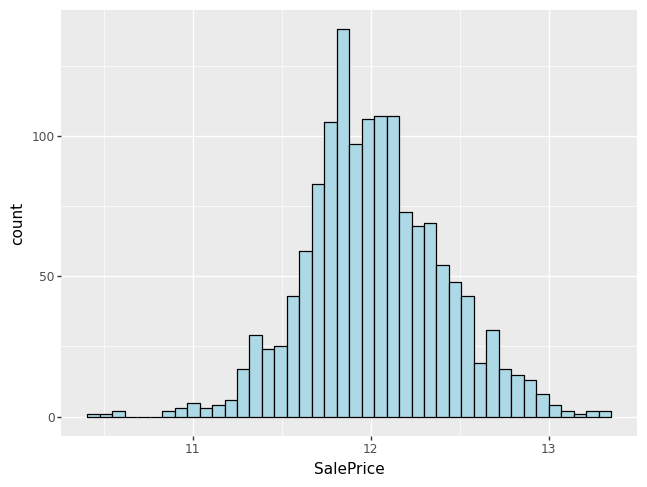

In [29]:
# plot log of SalePrice
p_sales_hist = (
    ggplot(train) +
    aes(train['SalePrice']) +
    geom_histogram(
        bins=42,
        colour='black',
        fill='lightblue'
    )
)
p_sales_hist.draw()

# Preprocess with Pipelines

### Separate columns into numeric and categorical, splitting the categorical ones by the type of encoding we wish to use.

In [30]:
ohe_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual', \
            'BsmtFinType1',  'CentralAir',  'Functional', 'FireplaceQu', \
            'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', \
            'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

ode_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', \
            'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
            'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', \
            'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [31]:
# number columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

### Set up Pipelines

In [32]:
# our categorical pipelines will impute missing values and encode our columns
ode_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
]   
)

ohe_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
]   
)

In [33]:
# our numerical pipeline will impute missing values and scale the data
num_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
]
    
)

In [34]:
# transform columns according to the pipelines we've set up
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
],
                              remainder='passthrough',
                              n_jobs=-1)

In [35]:
# combine all of our work into our final pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

### Apply Transform and Split Into Train and Test Data

In [36]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [37]:
# fit transforms performed in our pipeline to our train data
X_preprocessed = pipeline.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Evaluate the Performance of a Few Models

### Stochastic Gradient Descent Regressor

In [39]:
sgdr = SGDRegressor()

In [40]:
# some parameters we would like to tune
param_sgdr = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1'],
    'alpha': [0.01, 0.1, 1, 3, 5],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

In [41]:
sgdr_cv = GridSearchCV(sgdr, param_sgdr, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

In [42]:
sgdr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 3, 5],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_root_mean_squared_error')

In [43]:
-1 * sgdr_cv.best_score_

0.14470448834666083

In [44]:
sgdr_cv.best_params_

{'alpha': 5,
 'learning_rate': 'adaptive',
 'loss': 'epsilon_insensitive',
 'penalty': 'l2'}

### Random Forest Regressor

In [45]:
rfr = RandomForestRegressor()

In [46]:
param_rfr = {
    'n_estimators': [100, 250, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [3, 5, 10]
}

In [47]:
rfr_cv = GridSearchCV(rfr, param_rfr, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_root_mean_squared_error')

In [48]:
-1 * rfr_cv.best_score_

0.1298132255099266

In [49]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 500}

### Ridge

In [50]:
ridge = Ridge()

In [51]:
param_ridge = {
    'alpha': [0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [52]:
ridge_cv = GridSearchCV(ridge, param_ridge, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_root_mean_squared_error')

In [53]:
-1 * ridge_cv.best_score_

0.11248931529676852

In [54]:
ridge_cv.best_params_

{'alpha': 10, 'solver': 'auto'}

# Use Model to Predict House Prices for Test Data

In [55]:
# Since ridge performed the best, we will use this model
# choose model with best parameters from GridSearchCV
ridge_best = ridge_cv.best_estimator_

# fit to data
ridge_best.fit(X_train, y_train)

Ridge(alpha=10)

In [56]:
# use pipeline to perform the same data transformations on the test data
test_preprocessed = pipeline.transform(test)

In [57]:
# use model to predict house prices for test data
y_ridge = ridge_best.predict(test_preprocessed)

In [58]:
# recall that we took the log of SalePrice. we need to undo this
y_ridge = np.exp(y_ridge)

# Output to csv

In [59]:
# create our dataframe for submission by matching id to predicted saleprice
pred_df = pd.DataFrame({'Id': test['Id'], 'SalePrice': pd.Series(y_ridge)})

In [61]:
# output dataframe to csv file
# pred_df.to_csv('RidgeEditedSubmission.csv', index=False)

This model scored 0.13859 on the Kaggle competition.